In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.atr_adx_sma_m1_strategy import AtrAdxSmaM1Strategy
from datetime import datetime

2019-10-22 16:38:43.525447	开始加载历史数据
2019-10-22 16:38:43.526451	加载进度：###### [61%]
2019-10-22 16:38:43.526451	加载进度：########## [100%]
2019-10-22 16:38:43.526451	历史数据加载完成，数据量：68650
2019-10-22 16:38:43.571961	策略初始化完成
2019-10-22 16:38:43.571961	开始回放历史数据
2019-10-22 16:38:45.788858	历史数据回放结束
2019-10-22 16:38:45.788858	开始计算逐日盯市盈亏
2019-10-22 16:38:45.791864	逐日盯市盈亏计算完成
2019-10-22 16:38:45.791864	开始计算策略统计指标
2019-10-22 16:38:45.798860	------------------------------
2019-10-22 16:38:45.798860	首个交易日：	2019-09-02
2019-10-22 16:38:45.798860	最后交易日：	2019-10-20
2019-10-22 16:38:45.798860	总交易日：	49
2019-10-22 16:38:45.798860	盈利交易日：	22
2019-10-22 16:38:45.798860	亏损交易日：	27
2019-10-22 16:38:45.798860	起始资金：	200,000.00
2019-10-22 16:38:45.798860	结束资金：	251,101.50
2019-10-22 16:38:45.798860	总收益率：	25.55%
2019-10-22 16:38:45.798860	年化收益：	125.15%
2019-10-22 16:38:45.798860	最大回撤: 	-13,491.00
2019-10-22 16:38:45.798860	百分比最大回撤: -6.66%
2019-10-22 16:38:45.798860	总盈亏：	51,101.50
2019-10-22 16:38:45.798860	总手续费：	0.00
2019-10

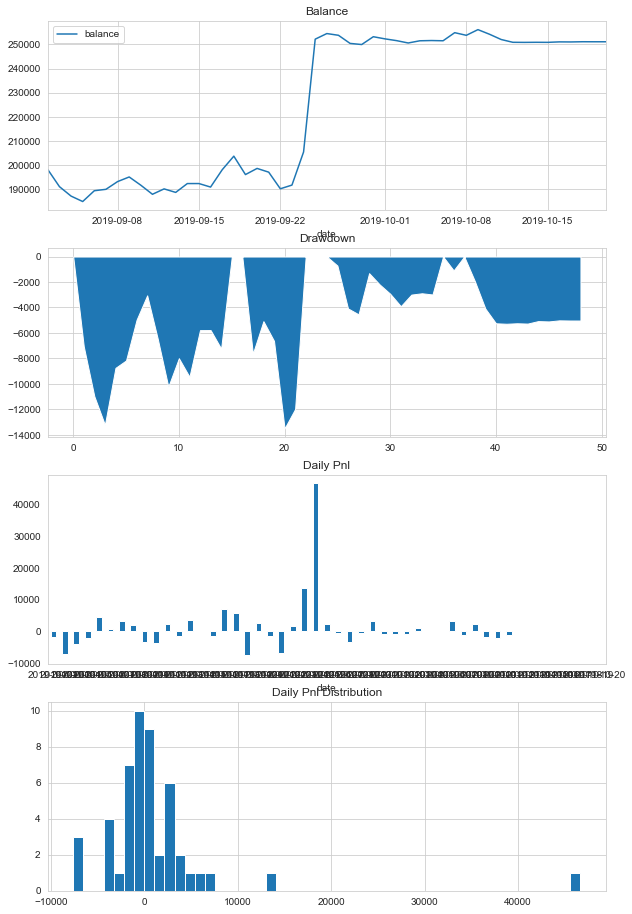

In [4]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="BCHUSDT.OKEX",
    interval="1m",
    start=datetime(2019, 9, 1),
    end=datetime(2019, 10, 20),
    rate=0.0,
    slippage=0.0,
    size=1,
    pricetick=0.01,
    capital=200_000,
)

AtrAdxSmaM1Strategy.atr_length = 25
AtrAdxSmaM1Strategy.atr_ma_length = 20
AtrAdxSmaM1Strategy.adx_length = 30
AtrAdxSmaM1Strategy.adx_entry_point = 35
AtrAdxSmaM1Strategy.sma_length = 15
AtrAdxSmaM1Strategy.trailing_percent = 9

engine.add_strategy(AtrAdxSmaM1Strategy, {})

#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics();
engine.show_chart()

In [5]:
setting = OptimizationSetting()
setting.set_target("total_return")

# setting.add_parameter("atr_length", 2, 30, 2)
# setting.add_parameter("atr_ma_length", 2, 30, 2)
# setting.add_parameter("adx_length", 2, 30, 2)
# setting.add_parameter("adx_entry_point", 20, 40, 2)
# settsetting.add_parameter("sma_window", 2, 40, 2)
ing.add_parameter("sma_window", 10, 40, 1)

setting.add_parameter("trailing_percent", 8, 10, 0.1)

engine.run_ga_optimization(setting, population_size=10, ngen_size=1000)

2019-10-22 16:40:26.395397	参数优化空间：651
2019-10-22 16:40:26.396396	每代族群总数：10
2019-10-22 16:40:26.396396	优良筛选个数：8
2019-10-22 16:40:26.396396	迭代次数：1000
2019-10-22 16:40:26.396396	交叉概率：95%
2019-10-22 16:40:26.396396	突变概率：5%
2019-10-22 16:40:26.396396	开始加载历史数据
2019-10-22 16:40:26.398362	加载进度：###### [61%]
2019-10-22 16:40:26.398362	加载进度：########## [100%]
2019-10-22 16:40:26.399364	历史数据加载完成，数据量：68650
2019-10-22 16:40:26.445360	策略初始化完成
2019-10-22 16:40:26.445360	开始回放历史数据
2019-10-22 16:40:28.315007	历史数据回放结束
2019-10-22 16:40:28.315007	开始计算逐日盯市盈亏
2019-10-22 16:40:28.317977	逐日盯市盈亏计算完成
2019-10-22 16:40:28.317977	开始计算策略统计指标
2019-10-22 16:40:28.324976	开始加载历史数据
2019-10-22 16:40:28.325974	加载进度：###### [61%]
2019-10-22 16:40:28.326977	加载进度：########## [100%]
2019-10-22 16:40:28.326977	历史数据加载完成，数据量：68650
2019-10-22 16:40:28.366007	策略初始化完成
2019-10-22 16:40:28.366007	开始回放历史数据
2019-10-22 16:40:30.175517	历史数据回放结束
2019-10-22 16:40:30.175517	开始计算逐日盯市盈亏
2019-10-22 16:40:30.178486	逐日盯市盈亏计算完成
2019-10-22 16:40:30.178

2019-10-22 16:41:06.564496	历史数据回放结束
2019-10-22 16:41:06.564496	开始计算逐日盯市盈亏
2019-10-22 16:41:06.567498	逐日盯市盈亏计算完成
2019-10-22 16:41:06.567498	开始计算策略统计指标
2019-10-22 16:41:06.573493	开始加载历史数据
2019-10-22 16:41:06.574493	加载进度：###### [61%]
2019-10-22 16:41:06.575495	加载进度：########## [100%]
2019-10-22 16:41:06.575495	历史数据加载完成，数据量：68650
2019-10-22 16:41:06.617460	策略初始化完成
2019-10-22 16:41:06.618460	开始回放历史数据
2019-10-22 16:41:08.623108	历史数据回放结束
2019-10-22 16:41:08.623108	开始计算逐日盯市盈亏
2019-10-22 16:41:08.625107	逐日盯市盈亏计算完成
2019-10-22 16:41:08.625107	开始计算策略统计指标
2  	10    	[19.554875]	[1.35138071]	[18.5081]	[21.2995]
2019-10-22 16:41:08.635107	开始加载历史数据
2019-10-22 16:41:08.635107	加载进度：###### [61%]
2019-10-22 16:41:08.636109	加载进度：########## [100%]
2019-10-22 16:41:08.636109	历史数据加载完成，数据量：68650
2019-10-22 16:41:08.675108	策略初始化完成
2019-10-22 16:41:08.675108	开始回放历史数据
2019-10-22 16:41:10.556694	历史数据回放结束
2019-10-22 16:41:10.556694	开始计算逐日盯市盈亏
2019-10-22 16:41:10.558693	逐日盯市盈亏计算完成
2019-10-22 16:41:10.558693	开始计算策略统计指

2019-10-22 16:41:43.270186	历史数据回放结束
2019-10-22 16:41:43.270186	开始计算逐日盯市盈亏
2019-10-22 16:41:43.273183	逐日盯市盈亏计算完成
2019-10-22 16:41:43.273183	开始计算策略统计指标
16 	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
17 	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
2019-10-22 16:41:43.282183	开始加载历史数据
2019-10-22 16:41:43.283185	加载进度：###### [61%]
2019-10-22 16:41:43.283185	加载进度：########## [100%]
2019-10-22 16:41:43.283185	历史数据加载完成，数据量：68650
2019-10-22 16:41:43.323182	策略初始化完成
2019-10-22 16:41:43.323182	开始回放历史数据
2019-10-22 16:41:45.227744	历史数据回放结束
2019-10-22 16:41:45.227744	开始计算逐日盯市盈亏
2019-10-22 16:41:45.230745	逐日盯市盈亏计算完成
2019-10-22 16:41:45.230745	开始计算策略统计指标
18 	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
19 	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
20 	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
21 	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
22 	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
23 	10    	[24.70165]   	[0.]   

2019-10-22 16:42:12.007596	历史数据回放结束
2019-10-22 16:42:12.007596	开始计算逐日盯市盈亏
2019-10-22 16:42:12.010596	逐日盯市盈亏计算完成
2019-10-22 16:42:12.010596	开始计算策略统计指标
55 	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
56 	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
57 	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
58 	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
59 	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
60 	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
61 	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
2019-10-22 16:42:12.026564	开始加载历史数据
2019-10-22 16:42:12.027589	加载进度：###### [61%]
2019-10-22 16:42:12.027589	加载进度：########## [100%]
2019-10-22 16:42:12.027589	历史数据加载完成，数据量：68650
2019-10-22 16:42:12.073592	策略初始化完成
2019-10-22 16:42:12.074595	开始回放历史数据
2019-10-22 16:42:13.869597	历史数据回放结束
2019-10-22 16:42:13.869597	开始计算逐日盯市盈亏
2019-10-22 16:42:13.871601	逐日盯市盈亏计算完成
2019-10-22 16:42:13.871601	开始计算策略统计指标
62 	10    	[24.70165]   	[0.]   

2019-10-22 16:42:42.633323	历史数据回放结束
2019-10-22 16:42:42.633323	开始计算逐日盯市盈亏
2019-10-22 16:42:42.636326	逐日盯市盈亏计算完成
2019-10-22 16:42:42.636326	开始计算策略统计指标
2019-10-22 16:42:42.643323	开始加载历史数据
2019-10-22 16:42:42.644323	加载进度：###### [61%]
2019-10-22 16:42:42.645323	加载进度：########## [100%]
2019-10-22 16:42:42.645323	历史数据加载完成，数据量：68650
2019-10-22 16:42:42.684323	策略初始化完成
2019-10-22 16:42:42.684323	开始回放历史数据
2019-10-22 16:42:44.500322	历史数据回放结束
2019-10-22 16:42:44.500322	开始计算逐日盯市盈亏
2019-10-22 16:42:44.503322	逐日盯市盈亏计算完成
2019-10-22 16:42:44.503322	开始计算策略统计指标
95 	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
2019-10-22 16:42:44.511320	开始加载历史数据
2019-10-22 16:42:44.512323	加载进度：###### [61%]
2019-10-22 16:42:44.512323	加载进度：########## [100%]
2019-10-22 16:42:44.512323	历史数据加载完成，数据量：68650
2019-10-22 16:42:44.552325	策略初始化完成
2019-10-22 16:42:44.552325	开始回放历史数据
2019-10-22 16:42:46.372342	历史数据回放结束
2019-10-22 16:42:46.373344	开始计算逐日盯市盈亏
2019-10-22 16:42:46.375345	逐日盯市盈亏计算完成
2019-10-22 16:42:46.375345	开始计算策

2019-10-22 16:43:09.383089	历史数据回放结束
2019-10-22 16:43:09.383089	开始计算逐日盯市盈亏
2019-10-22 16:43:09.385088	逐日盯市盈亏计算完成
2019-10-22 16:43:09.385088	开始计算策略统计指标
2019-10-22 16:43:09.392087	开始加载历史数据
2019-10-22 16:43:09.393088	加载进度：###### [61%]
2019-10-22 16:43:09.393088	加载进度：########## [100%]
2019-10-22 16:43:09.393088	历史数据加载完成，数据量：68650
2019-10-22 16:43:09.433088	策略初始化完成
2019-10-22 16:43:09.433088	开始回放历史数据
2019-10-22 16:43:11.249912	历史数据回放结束
2019-10-22 16:43:11.250914	开始计算逐日盯市盈亏
2019-10-22 16:43:11.252914	逐日盯市盈亏计算完成
2019-10-22 16:43:11.252914	开始计算策略统计指标
143	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
144	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
145	10    	[24.70165]   	[0.]        	[24.70165]	[24.70165]
2019-10-22 16:43:11.264945	开始加载历史数据
2019-10-22 16:43:11.264945	加载进度：###### [61%]
2019-10-22 16:43:11.265946	加载进度：########## [100%]
2019-10-22 16:43:11.265946	历史数据加载完成，数据量：68650
2019-10-22 16:43:11.304946	策略初始化完成
2019-10-22 16:43:11.304946	开始回放历史数据
2019-10-22 16:43:13.1309

2019-10-22 16:43:39.999142	历史数据回放结束
2019-10-22 16:43:39.999142	开始计算逐日盯市盈亏
2019-10-22 16:43:40.002143	逐日盯市盈亏计算完成
2019-10-22 16:43:40.002143	开始计算策略统计指标
175	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:43:40.011144	开始加载历史数据
2019-10-22 16:43:40.011144	加载进度：###### [61%]
2019-10-22 16:43:40.012145	加载进度：########## [100%]
2019-10-22 16:43:40.012145	历史数据加载完成，数据量：68650
2019-10-22 16:43:40.051111	策略初始化完成
2019-10-22 16:43:40.051111	开始回放历史数据
2019-10-22 16:43:42.015649	历史数据回放结束
2019-10-22 16:43:42.015649	开始计算逐日盯市盈亏
2019-10-22 16:43:42.018657	逐日盯市盈亏计算完成
2019-10-22 16:43:42.018657	开始计算策略统计指标
176	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:43:42.028657	开始加载历史数据
2019-10-22 16:43:42.028657	加载进度：###### [61%]
2019-10-22 16:43:42.029657	加载进度：########## [100%]
2019-10-22 16:43:42.029657	历史数据加载完成，数据量：68650
2019-10-22 16:43:42.073624	策略初始化完成
2019-10-22 16:43:42.074659	开始回放历史数据
2019-10-22 16:43:43.984833	历史数据回放结束
2019-10-22 16:43:43.984833	开始计算逐日盯市盈亏
2019-10-22

2019-10-22 16:44:11.438142	历史数据回放结束
2019-10-22 16:44:11.438142	开始计算逐日盯市盈亏
2019-10-22 16:44:11.440141	逐日盯市盈亏计算完成
2019-10-22 16:44:11.440141	开始计算策略统计指标
208	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
209	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
210	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
211	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
212	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
213	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:44:11.456150	开始加载历史数据
2019-10-22 16:44:11.457140	加载进度：###### [61%]
2019-10-22 16:44:11.457140	加载进度：########## [100%]
2019-10-22 16:44:11.457140	历史数据加载完成，数据量：68650
2019-10-22 16:44:11.497140	策略初始化完成
2019-10-22 16:44:11.497140	开始回放历史数据
2019-10-22 16:44:13.365724	历史数据回放结束
2019-10-22 16:44:13.365724	开始计算逐日盯市盈亏
2019-10-22 16:44:13.368695	逐日盯市盈亏计算完成
2019-10-22 16:44:13.368695	开始计算策略统计指标
214	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:44:13.376692	开始加载历

2019-10-22 16:44:44.247848	历史数据回放结束
2019-10-22 16:44:44.247848	开始计算逐日盯市盈亏
2019-10-22 16:44:44.250819	逐日盯市盈亏计算完成
2019-10-22 16:44:44.250819	开始计算策略统计指标
241	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
242	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:44:44.259817	开始加载历史数据
2019-10-22 16:44:44.260818	加载进度：###### [61%]
2019-10-22 16:44:44.261818	加载进度：########## [100%]
2019-10-22 16:44:44.261818	历史数据加载完成，数据量：68650
2019-10-22 16:44:44.301850	策略初始化完成
2019-10-22 16:44:44.301850	开始回放历史数据
2019-10-22 16:44:46.137441	历史数据回放结束
2019-10-22 16:44:46.137441	开始计算逐日盯市盈亏
2019-10-22 16:44:46.140442	逐日盯市盈亏计算完成
2019-10-22 16:44:46.140442	开始计算策略统计指标
2019-10-22 16:44:46.147441	开始加载历史数据
2019-10-22 16:44:46.148447	加载进度：###### [61%]
2019-10-22 16:44:46.148447	加载进度：########## [100%]
2019-10-22 16:44:46.148447	历史数据加载完成，数据量：68650
2019-10-22 16:44:46.188442	策略初始化完成
2019-10-22 16:44:46.188442	开始回放历史数据
2019-10-22 16:44:48.116031	历史数据回放结束
2019-10-22 16:44:48.117031	开始计算逐日盯市盈亏
2019-10-22

2019-10-22 16:45:15.277308	历史数据回放结束
2019-10-22 16:45:15.278315	开始计算逐日盯市盈亏
2019-10-22 16:45:15.280321	逐日盯市盈亏计算完成
2019-10-22 16:45:15.280321	开始计算策略统计指标
281	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
282	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
283	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
284	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:45:15.293276	开始加载历史数据
2019-10-22 16:45:15.294276	加载进度：###### [61%]
2019-10-22 16:45:15.294276	加载进度：########## [100%]
2019-10-22 16:45:15.294276	历史数据加载完成，数据量：68650
2019-10-22 16:45:15.334307	策略初始化完成
2019-10-22 16:45:15.335309	开始回放历史数据
2019-10-22 16:45:17.161759	历史数据回放结束
2019-10-22 16:45:17.161759	开始计算逐日盯市盈亏
2019-10-22 16:45:17.163758	逐日盯市盈亏计算完成
2019-10-22 16:45:17.163758	开始计算策略统计指标
2019-10-22 16:45:17.170757	开始加载历史数据
2019-10-22 16:45:17.172759	加载进度：###### [61%]
2019-10-22 16:45:17.172759	加载进度：########## [100%]
2019-10-22 16:45:17.173758	历史数据加载完成，数据量：68650
2019-10-22 16:45:17.212724	策略初始化完成


2019-10-22 16:45:46.122076	历史数据回放结束
2019-10-22 16:45:46.123080	开始计算逐日盯市盈亏
2019-10-22 16:45:46.125078	逐日盯市盈亏计算完成
2019-10-22 16:45:46.125078	开始计算策略统计指标
317	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
318	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
319	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:45:46.137076	开始加载历史数据
2019-10-22 16:45:46.138076	加载进度：###### [61%]
2019-10-22 16:45:46.139077	加载进度：########## [100%]
2019-10-22 16:45:46.139077	历史数据加载完成，数据量：68650
2019-10-22 16:45:46.179075	策略初始化完成
2019-10-22 16:45:46.179075	开始回放历史数据
2019-10-22 16:45:47.982661	历史数据回放结束
2019-10-22 16:45:47.982661	开始计算逐日盯市盈亏
2019-10-22 16:45:47.984661	逐日盯市盈亏计算完成
2019-10-22 16:45:47.985661	开始计算策略统计指标
320	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
321	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
322	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
323	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:45:47.998631	开始加载历

2019-10-22 16:46:14.980911	历史数据回放结束
2019-10-22 16:46:14.980911	开始计算逐日盯市盈亏
2019-10-22 16:46:14.982911	逐日盯市盈亏计算完成
2019-10-22 16:46:14.982911	开始计算策略统计指标
358	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:46:14.991910	开始加载历史数据
2019-10-22 16:46:14.992911	加载进度：###### [61%]
2019-10-22 16:46:14.993912	加载进度：########## [100%]
2019-10-22 16:46:14.993912	历史数据加载完成，数据量：68650
2019-10-22 16:46:15.033879	策略初始化完成
2019-10-22 16:46:15.033879	开始回放历史数据
2019-10-22 16:46:16.880323	历史数据回放结束
2019-10-22 16:46:16.880323	开始计算逐日盯市盈亏
2019-10-22 16:46:16.883326	逐日盯市盈亏计算完成
2019-10-22 16:46:16.883326	开始计算策略统计指标
359	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:46:16.892324	开始加载历史数据
2019-10-22 16:46:16.893290	加载进度：###### [61%]
2019-10-22 16:46:16.893290	加载进度：########## [100%]
2019-10-22 16:46:16.893290	历史数据加载完成，数据量：68650
2019-10-22 16:46:16.933321	策略初始化完成
2019-10-22 16:46:16.933321	开始回放历史数据
2019-10-22 16:46:18.776479	历史数据回放结束
2019-10-22 16:46:18.777480	开始计算逐日盯市盈亏
2019-10-22

2019-10-22 16:46:45.963857	历史数据回放结束
2019-10-22 16:46:45.963857	开始计算逐日盯市盈亏
2019-10-22 16:46:45.965857	逐日盯市盈亏计算完成
2019-10-22 16:46:45.966856	开始计算策略统计指标
389	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
390	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:46:45.976858	开始加载历史数据
2019-10-22 16:46:45.977857	加载进度：###### [61%]
2019-10-22 16:46:45.978858	加载进度：########## [100%]
2019-10-22 16:46:45.978858	历史数据加载完成，数据量：68650
2019-10-22 16:46:46.017856	策略初始化完成
2019-10-22 16:46:46.017856	开始回放历史数据
2019-10-22 16:46:47.951933	历史数据回放结束
2019-10-22 16:46:47.952903	开始计算逐日盯市盈亏
2019-10-22 16:46:47.954900	逐日盯市盈亏计算完成
2019-10-22 16:46:47.954900	开始计算策略统计指标
391	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
392	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
393	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
394	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
395	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:46:47.970900	开始加载历

2019-10-22 16:47:15.139115	历史数据回放结束
2019-10-22 16:47:15.140116	开始计算逐日盯市盈亏
2019-10-22 16:47:15.142115	逐日盯市盈亏计算完成
2019-10-22 16:47:15.142115	开始计算策略统计指标
444	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:47:15.151149	开始加载历史数据
2019-10-22 16:47:15.151149	加载进度：###### [61%]
2019-10-22 16:47:15.152122	加载进度：########## [100%]
2019-10-22 16:47:15.152122	历史数据加载完成，数据量：68650
2019-10-22 16:47:15.192115	策略初始化完成
2019-10-22 16:47:15.192115	开始回放历史数据
2019-10-22 16:47:17.003674	历史数据回放结束
2019-10-22 16:47:17.003674	开始计算逐日盯市盈亏
2019-10-22 16:47:17.006626	逐日盯市盈亏计算完成
2019-10-22 16:47:17.006626	开始计算策略统计指标
445	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
446	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:47:17.017139	开始加载历史数据
2019-10-22 16:47:17.017139	加载进度：###### [61%]
2019-10-22 16:47:17.018142	加载进度：########## [100%]
2019-10-22 16:47:17.018142	历史数据加载完成，数据量：68650
2019-10-22 16:47:17.066140	策略初始化完成
2019-10-22 16:47:17.066140	开始回放历史数据
2019-10-22 16:47:19.0081

2019-10-22 16:47:44.084603	历史数据回放结束
2019-10-22 16:47:44.084603	开始计算逐日盯市盈亏
2019-10-22 16:47:44.087564	逐日盯市盈亏计算完成
2019-10-22 16:47:44.087564	开始计算策略统计指标
482	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
483	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
484	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
485	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:47:44.100594	开始加载历史数据
2019-10-22 16:47:44.100594	加载进度：###### [61%]
2019-10-22 16:47:44.101603	加载进度：########## [100%]
2019-10-22 16:47:44.101603	历史数据加载完成，数据量：68650
2019-10-22 16:47:44.141560	策略初始化完成
2019-10-22 16:47:44.142561	开始回放历史数据
2019-10-22 16:47:45.977076	历史数据回放结束
2019-10-22 16:47:45.977076	开始计算逐日盯市盈亏
2019-10-22 16:47:45.979075	逐日盯市盈亏计算完成
2019-10-22 16:47:45.979075	开始计算策略统计指标
486	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:47:45.988074	开始加载历史数据
2019-10-22 16:47:45.989077	加载进度：###### [61%]
2019-10-22 16:47:45.989077	加载进度：########## [100%]
2019-10-22 16:47:45.9

2019-10-22 16:48:15.158317	历史数据回放结束
2019-10-22 16:48:15.158317	开始计算逐日盯市盈亏
2019-10-22 16:48:15.161317	逐日盯市盈亏计算完成
2019-10-22 16:48:15.161317	开始计算策略统计指标
521	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
522	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:48:15.172317	开始加载历史数据
2019-10-22 16:48:15.172317	加载进度：###### [61%]
2019-10-22 16:48:15.173318	加载进度：########## [100%]
2019-10-22 16:48:15.173318	历史数据加载完成，数据量：68650
2019-10-22 16:48:15.215315	策略初始化完成
2019-10-22 16:48:15.215315	开始回放历史数据
2019-10-22 16:48:17.080317	历史数据回放结束
2019-10-22 16:48:17.080317	开始计算逐日盯市盈亏
2019-10-22 16:48:17.083317	逐日盯市盈亏计算完成
2019-10-22 16:48:17.083317	开始计算策略统计指标
523	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
524	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
525	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
526	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
527	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
528	10    	[25.55075]   	[0.]   

2019-10-22 16:48:44.229053	历史数据回放结束
2019-10-22 16:48:44.229053	开始计算逐日盯市盈亏
2019-10-22 16:48:44.232050	逐日盯市盈亏计算完成
2019-10-22 16:48:44.232050	开始计算策略统计指标
566	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:48:44.241052	开始加载历史数据
2019-10-22 16:48:44.241052	加载进度：###### [61%]
2019-10-22 16:48:44.242019	加载进度：########## [100%]
2019-10-22 16:48:44.242019	历史数据加载完成，数据量：68650
2019-10-22 16:48:44.282018	策略初始化完成
2019-10-22 16:48:44.282018	开始回放历史数据
2019-10-22 16:48:46.157574	历史数据回放结束
2019-10-22 16:48:46.157574	开始计算逐日盯市盈亏
2019-10-22 16:48:46.160574	逐日盯市盈亏计算完成
2019-10-22 16:48:46.160574	开始计算策略统计指标
567	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
568	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
569	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:48:46.171598	开始加载历史数据
2019-10-22 16:48:46.172599	加载进度：###### [61%]
2019-10-22 16:48:46.173600	加载进度：########## [100%]
2019-10-22 16:48:46.173600	历史数据加载完成，数据量：68650
2019-10-22 16:48:46.213572	策略初始化完成


2019-10-22 16:49:15.107629	历史数据回放结束
2019-10-22 16:49:15.107629	开始计算逐日盯市盈亏
2019-10-22 16:49:15.110631	逐日盯市盈亏计算完成
2019-10-22 16:49:15.110631	开始计算策略统计指标
617	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
618	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
619	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
620	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
621	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
622	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
623	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
624	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
625	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
626	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
627	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
628	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:49:15.136633	开始加载历史数据
2019-10-22 16:49:15.137632	加载进度：###### [61%]
2019-10-22 16:49:15.137632	加载进度：########## [100%]

2019-10-22 16:49:36.879470	历史数据回放结束
2019-10-22 16:49:36.879470	开始计算逐日盯市盈亏
2019-10-22 16:49:36.882476	逐日盯市盈亏计算完成
2019-10-22 16:49:36.882476	开始计算策略统计指标
686	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:49:36.890439	开始加载历史数据
2019-10-22 16:49:36.891438	加载进度：###### [61%]
2019-10-22 16:49:36.892441	加载进度：########## [100%]
2019-10-22 16:49:36.892441	历史数据加载完成，数据量：68650
2019-10-22 16:49:36.931435	策略初始化完成
2019-10-22 16:49:36.931435	开始回放历史数据
2019-10-22 16:49:38.821435	历史数据回放结束
2019-10-22 16:49:38.822437	开始计算逐日盯市盈亏
2019-10-22 16:49:38.824468	逐日盯市盈亏计算完成
2019-10-22 16:49:38.824468	开始计算策略统计指标
2019-10-22 16:49:38.832437	开始加载历史数据
2019-10-22 16:49:38.833438	加载进度：###### [61%]
2019-10-22 16:49:38.834438	加载进度：########## [100%]
2019-10-22 16:49:38.834438	历史数据加载完成，数据量：68650
2019-10-22 16:49:38.877436	策略初始化完成
2019-10-22 16:49:38.877436	开始回放历史数据
2019-10-22 16:49:40.851018	历史数据回放结束
2019-10-22 16:49:40.851018	开始计算逐日盯市盈亏
2019-10-22 16:49:40.853017	逐日盯市盈亏计算完成
2019-10-22 16:49:40.853017	开始计算策

2019-10-22 16:50:06.450114	历史数据回放结束
2019-10-22 16:50:06.450114	开始计算逐日盯市盈亏
2019-10-22 16:50:06.452084	逐日盯市盈亏计算完成
2019-10-22 16:50:06.452084	开始计算策略统计指标
729	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
730	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:50:06.463107	开始加载历史数据
2019-10-22 16:50:06.464082	加载进度：###### [61%]
2019-10-22 16:50:06.464082	加载进度：########## [100%]
2019-10-22 16:50:06.464082	历史数据加载完成，数据量：68650
2019-10-22 16:50:06.507080	策略初始化完成
2019-10-22 16:50:06.507080	开始回放历史数据
2019-10-22 16:50:08.416063	历史数据回放结束
2019-10-22 16:50:08.416063	开始计算逐日盯市盈亏
2019-10-22 16:50:08.418024	逐日盯市盈亏计算完成
2019-10-22 16:50:08.418024	开始计算策略统计指标
731	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
732	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
733	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:50:08.430025	开始加载历史数据
2019-10-22 16:50:08.431025	加载进度：###### [61%]
2019-10-22 16:50:08.432026	加载进度：########## [100%]
2019-10-22 16:50:08.4

2019-10-22 16:50:34.203255	历史数据回放结束
2019-10-22 16:50:34.204255	开始计算逐日盯市盈亏
2019-10-22 16:50:34.207287	逐日盯市盈亏计算完成
2019-10-22 16:50:34.207287	开始计算策略统计指标
2019-10-22 16:50:34.214289	开始加载历史数据
2019-10-22 16:50:34.215287	加载进度：###### [61%]
2019-10-22 16:50:34.215287	加载进度：########## [100%]
2019-10-22 16:50:34.215287	历史数据加载完成，数据量：68650
2019-10-22 16:50:34.254288	策略初始化完成
2019-10-22 16:50:34.255290	开始回放历史数据
2019-10-22 16:50:36.110256	历史数据回放结束
2019-10-22 16:50:36.111289	开始计算逐日盯市盈亏
2019-10-22 16:50:36.113288	逐日盯市盈亏计算完成
2019-10-22 16:50:36.113288	开始计算策略统计指标
774	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
775	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
776	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:50:36.125290	开始加载历史数据
2019-10-22 16:50:36.126287	加载进度：###### [61%]
2019-10-22 16:50:36.127288	加载进度：########## [100%]
2019-10-22 16:50:36.127288	历史数据加载完成，数据量：68650
2019-10-22 16:50:36.166287	策略初始化完成
2019-10-22 16:50:36.166287	开始回放历史数据
2019-10-22 16:50:38.0372

2019-10-22 16:51:03.380165	历史数据回放结束
2019-10-22 16:51:03.380165	开始计算逐日盯市盈亏
2019-10-22 16:51:03.382165	逐日盯市盈亏计算完成
2019-10-22 16:51:03.382165	开始计算策略统计指标
822	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:51:03.392196	开始加载历史数据
2019-10-22 16:51:03.392196	加载进度：###### [61%]
2019-10-22 16:51:03.393199	加载进度：########## [100%]
2019-10-22 16:51:03.393199	历史数据加载完成，数据量：68650
2019-10-22 16:51:03.432164	策略初始化完成
2019-10-22 16:51:03.432164	开始回放历史数据
2019-10-22 16:51:05.251198	历史数据回放结束
2019-10-22 16:51:05.251198	开始计算逐日盯市盈亏
2019-10-22 16:51:05.253199	逐日盯市盈亏计算完成
2019-10-22 16:51:05.253199	开始计算策略统计指标
823	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
824	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
825	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
826	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
827	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
828	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
829	10    	[25.55075]   	[0.]   

2019-10-22 16:51:28.147985	历史数据回放结束
2019-10-22 16:51:28.147985	开始计算逐日盯市盈亏
2019-10-22 16:51:28.150991	逐日盯市盈亏计算完成
2019-10-22 16:51:28.150991	开始计算策略统计指标
878	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
879	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
880	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:51:28.162986	开始加载历史数据
2019-10-22 16:51:28.163986	加载进度：###### [61%]
2019-10-22 16:51:28.163986	加载进度：########## [100%]
2019-10-22 16:51:28.163986	历史数据加载完成，数据量：68650
2019-10-22 16:51:28.204951	策略初始化完成
2019-10-22 16:51:28.204951	开始回放历史数据
2019-10-22 16:51:30.150988	历史数据回放结束
2019-10-22 16:51:30.150988	开始计算逐日盯市盈亏
2019-10-22 16:51:30.152988	逐日盯市盈亏计算完成
2019-10-22 16:51:30.152988	开始计算策略统计指标
881	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:51:30.161951	开始加载历史数据
2019-10-22 16:51:30.161951	加载进度：###### [61%]
2019-10-22 16:51:30.162952	加载进度：########## [100%]
2019-10-22 16:51:30.162952	历史数据加载完成，数据量：68650
2019-10-22 16:51:30.203951	策略初始化完成


2019-10-22 16:51:58.952388	历史数据回放结束
2019-10-22 16:51:58.953386	开始计算逐日盯市盈亏
2019-10-22 16:51:58.956386	逐日盯市盈亏计算完成
2019-10-22 16:51:58.956386	开始计算策略统计指标
929	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
930	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
931	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
932	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
933	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
934	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
935	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
936	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:51:58.978385	开始加载历史数据
2019-10-22 16:51:58.979387	加载进度：###### [61%]
2019-10-22 16:51:58.979387	加载进度：########## [100%]
2019-10-22 16:51:58.979387	历史数据加载完成，数据量：68650
2019-10-22 16:51:59.018423	策略初始化完成
2019-10-22 16:51:59.018423	开始回放历史数据
2019-10-22 16:52:00.943148	历史数据回放结束
2019-10-22 16:52:00.943148	开始计算逐日盯市盈亏
2019-10-22 16:52:00.945148	逐日盯市盈亏计算完成
2019-10-22

2019-10-22 16:52:18.284205	历史数据回放结束
2019-10-22 16:52:18.284205	开始计算逐日盯市盈亏
2019-10-22 16:52:18.287207	逐日盯市盈亏计算完成
2019-10-22 16:52:18.287207	开始计算策略统计指标
1000	10    	[25.55075]   	[0.]        	[25.55075]	[25.55075]
2019-10-22 16:52:18.296205	遗传算法优化完成，耗时711秒


[({'sma_window': 33, 'trailing_percent': 8.999999999999996}, 25.55075, {}),
 ({'sma_window': 15, 'trailing_percent': 8.999999999999996}, 25.55075, {}),
 ({'sma_window': 19, 'trailing_percent': 8.999999999999996}, 25.55075, {}),
 ({'sma_window': 32, 'trailing_percent': 8.999999999999996}, 25.55075, {}),
 ({'sma_window': 10, 'trailing_percent': 8.999999999999996}, 25.55075, {}),
 ({'sma_window': 25, 'trailing_percent': 8.999999999999996}, 25.55075, {}),
 ({'sma_window': 18, 'trailing_percent': 8.999999999999996}, 25.55075, {}),
 ({'sma_window': 11, 'trailing_percent': 8.999999999999996}, 25.55075, {}),
 ({'sma_window': 39, 'trailing_percent': 8.999999999999996}, 25.55075, {}),
 ({'sma_window': 36, 'trailing_percent': 8.999999999999996}, 25.55075, {}),
 ({'sma_window': 38, 'trailing_percent': 8.999999999999996}, 25.55075, {}),
 ({'sma_window': 20, 'trailing_percent': 8.999999999999996}, 25.55075, {}),
 ({'sma_window': 14, 'trailing_percent': 8.999999999999996}, 25.55075, {}),
 ({'sma_wind